# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
import csv
dict_signs = {}
with open('signnames.csv', 'r') as csvfile:
    lines = csvfile.readlines()
    n_classes = len(lines) - 1 
    count = 0 
    for row in lines:
        if count > 0: 
            dict_signs[count - 1] = row.split(',')[1]
        count += 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

9
No passing



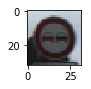

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
index = random.randint(0, n_train)
image = X_train[index]
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(dict_signs[y_train[index]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

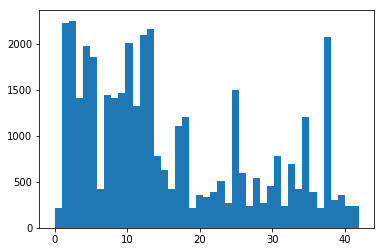

In [4]:
### Preprocess the data here.
##Constrast Limited Adaptative Histogram Equalization
#import cv2
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#for i in range(len(X_train)):
#    X_train[i][:][:][0] = clahe.apply(X_train[i][:][:][0])
#    X_train[i][:][:][1] = clahe.apply(X_train[i][:][:][1])
#    X_train[i][:][:][2] = clahe.apply(X_train[i][:][:][2])
#for i in range(len(X_test)):   
#    X_test[i][:][:][0] = clahe.apply(X_test[i][:][:][0])
#    X_test[i][:][:][1] = clahe.apply(X_test[i][:][:][1])
#    X_test[i][:][:][2] = clahe.apply(X_test[i][:][:][2])

### min-max scaling
import numpy as np
X_train = -1 + 2*(X_train/255)
X_test = -1 + 2*(X_test/255)
plt.hist(y_train, bins=n_classes)

In [5]:
hist = np.histogram(y_train, bins=n_classes)
hist_counts = hist[0]
max_class = np.argmax(hist_counts)
max_count = np.amax(hist_counts)
print(hist_counts)
print('The max class is ' + str(max_class))
print('The number of training samples of class ' + str(max_class) + " is " + str(max_count))

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
The max class is 2
The number of training samples of class 2 is 2250


In [6]:
import sys
import os
from scipy import ndimage

n_extra_data = 0
diff_list = []
for i in range(n_classes):
    diff = max_count - hist_counts[i]
    diff_list.append(diff)
    n_extra_data += diff 
    
X_new = np.zeros([n_train + n_extra_data,32,32,3])
y_new = np.zeros(n_train + n_extra_data)
X_new[0:n_train, :, :, :] = X_train 
y_new[0:n_train] = y_train

print("Generating new data to balance the training dataset ... \n")
count = 0
for i in range(n_classes):
    diff = diff_list[i]
    indices_same_class = np.where(y_train == i)[0]
    print("Class " + str(i))
    for k in range(diff):
        percent = 100.0*k/(diff-1)
        if k%50 == 0 or percent == 100.0:
            sys.stdout.write("\r Percentage: " + str(percent) + "%                           \r")
            sys.stdout.flush()
        random_index = random.choice(indices_same_class) 
        random_sample = X_train[random_index]
        random_rotation = random.uniform(-10, 10)
        random_sample = ndimage.rotate(random_sample, random_rotation, reshape=False)
        random_sample = random_sample.reshape(1,32,32,3)
        random_value = random.uniform(-0.2, 0.2)
        if random_value >= 0:
            random_sample = np.where((random_sample + random_value) > 1,1,random_sample+random_value)
        else:
            random_sample = np.where((random_sample + random_value) < -1,-1,random_sample+random_value)
        X_new[n_train + count, :,:,:] = random_sample
        y_new[n_train + count] = i
        count += 1
    print("\n")
X_train = X_new
del X_new
y_train = y_new
del y_new
print("Data Generation Completed !")

Generating new data to balance the training dataset ... 

Class 0
 Percentage: 100.0%                                   

Class 1
 Percentage: 100.0%                           

Class 2


Class 3
 Percentage: 100.0%                                   

Class 4
 Percentage: 100.0%                                   

Class 5
 Percentage: 100.0%                                   

Class 6
 Percentage: 100.0%                                   

Class 7
 Percentage: 100.0%                                   

Class 8
 Percentage: 100.0%                                   

Class 9
 Percentage: 100.0%                                   

Class 10
 Percentage: 100.0%                                   

Class 11
 Percentage: 100.0%                                   

Class 12
 Percentage: 100.0%                                   

Class 13
 Percentage: 100.0%                                   

Class 14
 Percentage: 100.0%                                   

Class 15
 Percentage: 100.0%           

In [7]:
balanced_data = {"features":X_train, "labels":y_train}
filename = 'balanced_train_data.pickle'
if os.path.exists(filename):
    os.remove(filename)
with open(filename, 'wb') as f:
    pickle.dump(balanced_data, f, pickle.HIGHEST_PROTOCOL)

The new size of the training dataset is 96750
96750


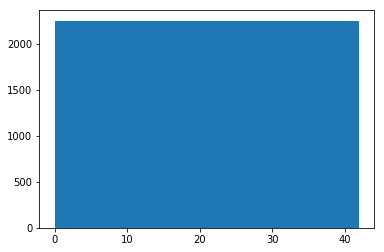

In [8]:
with open(filename, 'rb') as f:
    data = pickle.load(f)
    X_train = data["features"]
    y_train = data["labels"]
plt.hist(y_train, bins=n_classes)
print("The new size of the training dataset is " + str(len(y_train)))
print(len(X_train))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I used min-max scaling to normalize the training and test data to a range that goes from -1 to 1. This is very helpful as we would like our features to be of similar magnitude in order for gradient descent not to be biased towards certain features. Moreover, it's much easier for an optimizer to work on a "well-conditioned" dataset, i.e. 0 mean and equal variance. I chose not to convert the training and test images from colour to grayscale as I believe that colour might be important when detecting traffic signs.

In [9]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** As soon as I plotted my original training dataset using a histogram, I realized how imbalanced it was. Hence, I decided to generate additional training data by rotating and changing the brightness of enough random images from each class so that all classes have the same number of instances as the class corresponding to the tallest peak of the above-mentioned histogram. <br> 
I split my original training data into a training set and a validation set, i.e. 80% and 20% of the original training data respectively. I retained the original test set (see above).

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc0, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout Layer 
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
     # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3    = tf.nn.relu(fc3)
    
    # Dropout Layer 
    #fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes (43).
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My final architecture is a slight modification of the LeNet architecture: <br>
1) Convolutional layer with a 5X5 filter, strides of 1 and 'VALID' padding (input depth = 3 and output depth = 12)<br>
2) A rectified linear activation unit <br>
3) A pooling layer with a 2X2X1 filter and 'VALID' padding <br>
4) Convolutional layer with a 5X5 filter, strides of 1 and 'VALID' padding (input depth = 12 and output depth = 32)<br>
5) A rectified linear activation unit <br>
6) A pooling layer with a 2X2X1 filter and 'VALID' padding <br>
7) Flattening the layer in 6 to a 1-dimensional array with 5x5x32 = 800 entries <br>
8) A fully connected layer with 120 neurons <br>
9) A rectified linear activation unit <br>
10) A dropout layer <br> 
11) A fully connected layer with 84 neurons <br>
12) A rectified linear activation unit <br>
13) A fully connected output layer with 43 logits, i.e. the number of classes <br>

I initialized features' weights and biases using truncated normals (mean = 0 and standard deviation = 0.1) and zeros, respectively.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

EPOCHS = 50
BATCH_SIZE = 512
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.814

EPOCH 2 ...
Validation Accuracy = 0.927

EPOCH 3 ...
Validation Accuracy = 0.959

EPOCH 4 ...
Validation Accuracy = 0.965

EPOCH 5 ...
Validation Accuracy = 0.978

EPOCH 6 ...
Validation Accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.987

EPOCH 10 ...
Validation Accuracy = 0.990

EPOCH 11 ...
Validation Accuracy = 0.990

EPOCH 12 ...
Validation Accuracy = 0.992

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.992

EPOCH 15 ...
Validation Accuracy = 0.994

EPOCH 16 ...
Validation Accuracy = 0.995

EPOCH 17 ...
Validation Accuracy = 0.995

EPOCH 18 ...
Validation Accuracy = 0.994

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.995

EPOCH 21 ...
Validation Accuracy = 0.995

EPOCH 22 ...
Validation Accuracy = 0.996

EPOCH 23 ...
Validation Accuracy = 0.996

EPOCH 24 ...
Validation Accura

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.961


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I trained my model using an AdamOptimizer based on backpropagation with a learning rate of 0.001. This optimizer minimized the "loss" function defined as the average cross entropy between the predicted logits and the actual one hot-encoded labels. During training I used 50 epochs and a batch size of 512. I also measured the validation accuracy for every epoch and printed that to screen.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Being able to use the Amazon graphics cards, I was able to increase the number of epochs and batch size up to 50 and 512, respectively, without significantly increasing the training time. I started off my solution with a typical LeNet architecture which I ended up modifying as described in the previous answer. I went through a fairly long process of trial and error in order to find a good "complexity" for my model, trying not to fall into the risks of underfitting or overfitting. For example, adding too many neurons or layers to my model could easily result in overfitting. In my model's architecture I tried to correct this by adding a dropout layer. The LeNet architecture and convolutional neural networks are in general suitable solutions for the current problem, as our dataset is made up of images. In fact, these models can easily deal with spatial correlation, as in the case of images, and have very useful properties like translational invariance. Moreover, they present a hierarchical structure such that the very first layers capture very specific features of the images, whereas deeper layers compute more complicated "concepts".  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

road_work.jpg
speed_30.jpg
bumpy_road.jpeg
children.jpg
stop.jpg


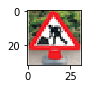

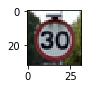

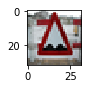

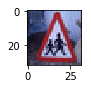

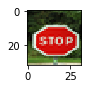

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import os

desired_width = 32
desired_height = 32

im_new_list = []

for filename in os.listdir('img_internet'):
    print(filename)
    im = Image.open('img_internet/' + filename)
    im_new = im.resize((desired_width, desired_height), Image.ANTIALIAS)
    plt.figure(figsize=(1,1))
    plt.imshow(im_new)
    #print(im_new.shape)
    im_new_list.append(im_new)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I displayed the five test images above. The five test pictures I chose show quite different backgrounds and light conditions. In particular, the road work and bumpy road traffic signs show a poor contrast with their ground support and background, respectively. In fact they have something red right next to them. Moreover, the 30km/h speed limit traffic sign looks pretty dirty near the top.

Actual: 25,Road work
Prediction: General caution
 (18) 

Actual: 1,Speed limit (30km/h)
Prediction: Speed limit (30km/h)
 (1) 

Actual: 22,Bumpy road
Prediction: Bumpy road
 (22) 

Actual: 28,Children crossing
Prediction: Children crossing
 (28) 

Actual: 14,Stop
Prediction: Stop
 (14) 



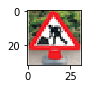

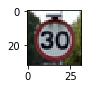

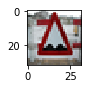

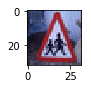

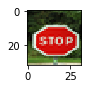

In [17]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

actuals = []
actuals.append('14,Stop')
actuals.append('28,Children crossing')
actuals.append('22,Bumpy road')
actuals.append('1,Speed limit (30km/h)')
actuals.append('25,Road work')
logits_list = []

for img in im_new_list:
    im_new = np.asarray(img)
    #im_cl = np.zeros([32,32,3])
    #im_cl[:][:][0] = clahe.apply(im_new[:][:][0])
    #im_cl[:][:][1] = clahe.apply(im_new[:][:][1])
    #im_cl[:][:][2] = clahe.apply(im_new[:][:][2])
    im_new = im_new[np.newaxis, ...]
    im_new = -1 + 2*(im_new/255)   
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        logits_new = sess.run(logits, feed_dict = {x: im_new, keep_prob: 1.0})
        logits_list.append(logits_new)
        prediction = np.argmax(logits_new)
        #print(prediction)
        print('Actual: ' + actuals.pop())
        print('Prediction: ' + str(dict_signs[prediction]) + " (" + str(prediction)+ ") \n")
        plt.figure(figsize=(1,1))
        plt.imshow(img)
        


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The five images shown above were randomly taken from the Internet. My model has an 80% accuracy on these 5 test images (i.e. 4 out of 5 traffic sign correctly predicted). This result is less than the accuracy I got on the provided test data set, i.e. 96.1%. This could be due to the small size of this test set and to the fact that in different countries traffic signs might be slightly different.

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
logits_soft = tf.placeholder(tf.float32, (n_classes))
probabilities = tf.nn.softmax(logits_soft, name=None)

with tf.Session() as sess:
    for logits_i in logits_list:
        logits_i = np.squeeze(logits_i)
        prob = sess.run(probabilities, feed_dict = {logits_soft: logits_i})
        #print(prob)
        top5 = sess.run(tf.nn.top_k(tf.constant(prob), k=5))
        print("Top 5: " + str(top5)) 
        
        

Top 5: TopKV2(values=array([  1.00000000e+00,   3.33784432e-13,   1.13291385e-17,
         6.04670010e-19,   5.52352697e-19], dtype=float32), indices=array([18, 14, 26, 25,  4], dtype=int32))
Top 5: TopKV2(values=array([  9.99994159e-01,   5.75650529e-06,   1.48018671e-07,
         2.58121873e-14,   5.18540812e-16], dtype=float32), indices=array([ 1,  5,  2, 42,  3], dtype=int32))
Top 5: TopKV2(values=array([  1.00000000e+00,   1.32992107e-27,   9.80624012e-32,
         6.32752093e-32,   2.42538877e-34], dtype=float32), indices=array([22, 29, 20, 25, 24], dtype=int32))
Top 5: TopKV2(values=array([  1.00000000e+00,   5.10338929e-24,   8.78536049e-25,
         1.31620701e-29,   9.82939574e-30], dtype=float32), indices=array([28, 24, 29,  3, 30], dtype=int32))
Top 5: TopKV2(values=array([  1.00000000e+00,   2.26571966e-18,   1.57794256e-18,
         1.39096188e-20,   1.63548388e-24], dtype=float32), indices=array([14,  5, 17,  1, 10], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** As we can observe from the softmax probabilities shown above, my model is very confident of the predictions it makes for the correctly classified traffic signs: <br>

1) Speed limit (30km/h) --> 99.9% <br>
2) Bumpy road           --> 99.9% <br>
3) Children crossing    --> 99.9% <br>
4) Stop                 --> 99.9% <br>

My model is also very sure about its incorrect prediction for the road work traffic sign. In fact, its top 5 predictions are <br>

i) General caution (18)       --> 99.9% <br>
ii) Stop (14)                 --> 3.33784432e-11% <br>
iii) Traffic signals (26)     --> 1.13291385e-15% <br>
iv) Road work (25)            --> 6.04670010e-17%   (actual traffic sign) <br>
v) Speed limit (70km/h) (4)   --> 5.52352697e-17% <br>

Even though the prediction for the road work traffic sign is incorrect, the correct prediction appears in the top 5 predictions. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.